# "Happiness" related data, a cross-country analysis from 2019

# Intro
What is happines? can we even measure it? these sounds like very philosophical questions.
The Gallup World Poll try to measure it using different parameters and using this parameters to give each country a score
the World Happines Report usually gives the first places to rich and developped countries with Social support from the government, an efficient sanitary system, ...
But does having money actually makes you happy? is there something else beside money and living in a developed country that can make you happy.
What are the differences between countries?

## Index
1. What data are we using? importing data
2. Data pre-processing, data cleaning
3. Basic Exploratory data (info, desccribe, histograms, correlations)
4. Analysis
    a. A cross country analysis with geopanda. 
    b. parameters analysis
5. Conclusion


# 1.What data are we using? importing data

We will use the World Happiness Report, a publication by Gallup World Poll, which gives each country a "happiness score" based on measurements anc calculation using different parameters, some parameters are surveys done to citizens of the country (like generosity or corruption perception), others are taken from their countries respective statistics.

The Wordl Happiness report parameters to get a score are: GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption. *there is another parameter which is culture which is not included because the dataset i fuounf form kaggle didnt have it.

On the other hand I wanted to complete my dataset with other parameters related happiness but also to the general context of the country, this data was taken from the World Bank:
CO2 emissions (kg per PPP $ of GDP), Intentional homicides (per 100,000 people), General gov final consumption expenditure (% of GDP), School enrollment, tertiary (% gross), School enrollment, secondary (% gross), Unemployment, total, Unemployment, youth total (ages 15-24), Gross capital formation (% of GDP), Gross domestic savings (% of GDP), Government expenditure on education, tot(% of GDP), Life expectancy at birth, (years), Age dependency ratio, young (% of working-age pop), GDP per capita PPP (constant 2017), Foreign direct investment, net inflows (% of GDP), GDP per capita growth (annual %), Trade (% of GDP), Inflation, consumer prices (annual %), Net migration, Strength of legal rights index (0=weak to 12=strong), Mortality rate, under-5 (per 1,000 live births), Population growth (annual %)

Let's start by importing the data and the firts packages necessary

In [124]:
import numpy as np
import pandas as pd

In [125]:
pd.set_option('display.max_columns', None)

In [126]:
happreport_df = pd.read_csv('happinessReport2019.csv')

In [127]:
happreport_df = happreport_df.rename(columns={'Country or region':'Country'})
happreport_df.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [128]:
worldbankhapp_df = pd.read_csv('P_happiness data/worldbankHappinessdata.csv')

In [129]:
worldbankhapp_df = worldbankhapp_df.rename(columns={'Country Name':'Country'})
worldbankhapp_df.head()

,Country,Country Code,Time,Time Code,CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],"Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5]",General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],"Community health workers (per 1,000 people) [SH.MED.CMHW.P3]","School enrollment, tertiary (% gross) [SE.TER.ENRR]","School enrollment, secondary (% gross) [SE.SEC.ENRR]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]",Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS],"Government expenditure per student, tertiary (% of GDP per capita) [SE.XPD.TERT.PC.ZS]","Government expenditure per student, secondary (% of GDP per capita) [SE.XPD.SECO.PC.ZS]","Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]","GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]",GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],Market capitalization of listed domestic companies (% of GDP) [CM.MKT.LCAP.GD.ZS],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Net migration [SM.POP.NETM],Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",Gini index [SI.POV.GINI],Net primary income (Net income from abroad) (constant LCU) [NY.GSR.NFCY.KN],Population growth (annual %) [SP.POP.GROW],"Secondary education, teachers [SE.SEC.TCHR]",Lending interest rate (%) [FR.INR.LEND]
0,Afghanistan,AFG,2019.0,YR2019,0.0742030060048053,7.18039716624779,..,..,..,..,..,..,..,..,..,..,3.21377992630005,63.565,83.112421,2079.92186098824,584.386882896106,0.123804203772499,0.932833388709597,..,..,2.30237251516844,-8082.0,10,59.9,..,..,2.908529,..,..
1,Albania,ALB,2019.0,YR2019,0.11743693675728,2.26174791010144,11.3469839128285,..,59.7784996032715,95.0865936279297,11.47,26.98,23.0125955147467,8.65282267424126,..,..,3.91665005683899,79.282,24.672047,13653.2267690592,4543.38652018643,7.7979181413124,2.52389372255597,..,76.2791946200238,1.41109078954248,-8889.0,8,9.4,30.1,..,-0.426007,23937,6.27583333333333
2,Algeria,DZA,2019.0,YR2019,0.330914644931275,1.21530387918325,18.3424679838475,..,52.6199417114258,..,..,..,44.6918398065115,38.3114764125832,..,..,6.10035991668701,76.474,47.858419,11627.2799177398,4153.00481594021,0.804110686575591,-0.840856657898996,..,51.8075701263808,1.95176821052894,-36386.0,2,23.5,..,..,1.839445,..,8
3,American Samoa,ASM,2019.0,YR2019,..,0,..,..,..,..,..,..,..,..,..,..,..,..,44.447334,..,13288.3565565116,..,1.83171396600592,..,156.568778979907,..,-1650.0,..,..,..,..,-2.304139,..,..
4,Andorra,AND,2019.0,YR2019,..,..,..,..,..,..,..,..,..,..,..,..,3.15060997009277,..,18.860798,..,39413.6344732996,..,0.238296569502523,..,..,..,1238.0,..,3,..,..,1.757491,566,..


We can notice that there are a lot of countries with out data

In [163]:
#Lets merge our datasets
data=pd.merge(happreport_df, worldbankhapp_df, on=["Country"])

In [164]:
data

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Time,Time Code,CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],"Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5]",General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],"Community health workers (per 1,000 people) [SH.MED.CMHW.P3]","School enrollment, tertiary (% gross) [SE.TER.ENRR]","School enrollment, secondary (% gross) [SE.SEC.ENRR]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]",Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS],"Government expenditure per student, tertiary (% of GDP per capita) [SE.XPD.TERT.PC.ZS]","Government expenditure per student, secondary (% of GDP per capita) [SE.XPD.SECO.PC.ZS]","Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]","GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]",GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD],"Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],Market capitalization of listed domestic companies (% of GDP) [CM.MKT.LCAP.GD.ZS],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Net migration [SM.POP.NETM],Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",Gini index [SI.POV.GINI],Net primary income (Net income from abroad) (constant LCU) [NY.GSR.NFCY.KN],Population growth (annual %) [SP.POP.GROW],"Secondary education, teachers [SE.SEC.TCHR]",Lending interest rate (%) [FR.INR.LEND]
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,2019.0,YR2019,0.142293730979104,1.46698296751276,23.1883030793219,..,92.9550094604492,145.318984985352,6.69,17.2,24.0930050279749,24.2468460505799,..,..,6.41710996627808,81.9829268292683,25.582477,48583.4339897935,46135.8814242631,5.81407868801805,1.11326909206437,..,79.605433214652,1.02409392963429,15558.0,6,2.3,27.7,1159774000,0.110192,39860,..
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,2019.0,YR2019,0.0849885410836566,1.13874032545199,24.1281269783016,..,81.8397598266602,129.885025024414,5.02,10.06,21.8530882279229,28.9226237517532,..,..,6.88857984542847,81.4512195121951,25.685655,56813.9641554635,57203.0277943447,-1.09718546490012,1.13065749415978,..,110.224828604234,0.758131572511619,23305.0,8,3.8,27.7,64422073000,0.358131,54639,..
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,2019.0,YR2019,0.0970401710454151,0.523532946162022,24.3499339410532,..,83.2306900024414,118.620162963867,3.69,9.96,29.8554167775132,31.3372250303355,..,..,7.93838977813721,82.9585365853659,26.759110,64385.0059928545,76005.224786526,4.03263923720599,0.0679926261787642,72.9855373000131,71.0444048577179,2.16773003305405,25564.0,5,2.4,27.7,99449083000,0.675061,50747.55859375,3.23583333333333
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,2019.0,YR2019,0.0755392121567911,0.277181452680275,24.4440098213804,..,77.5888366699219,115.444961547852,3.51,8.74,21.1222100589572,25.6348804772655,..,..,7.54735994338989,83.1634146341463,28.209767,56923.1724505126,57806.0637541946,-2.24144619228296,0.187989583706965,..,84.2053858648925,3.01397179156056,5152.0,4,2.7,..,..,2.198932,..,6.95
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,2019.0,YR2019,0.140132097605943,0.627762243861846,24.6150629416214,..,..,115.040657043457,3.38,6.73,22.0964141417247,31.9011628979589,..,..,5.15986013412476,82.1121951219512,24.254593,56784.0372529824,48443.7320540283,-1.55

# now we can start with some basic EDA and some data preprocessing

In [165]:
data.isnull().sum()

Overall rank                                                                                             0
Country                                                                                                  0
Score                                                                                                    0
GDP per capita                                                                                           0
Social support                                                                                           0
Healthy life expectancy                                                                                  0
Freedom to make life choices                                                                             0
Generosity                                                                                               0
Perceptions of corruption                                                                                0
Country Code                         

In [166]:
#data.loc[data['Government expenditure per student, tertiary (% of GDP per capita) [SE.XPD.TERT.PC.ZS]']=='..','Government expenditure per student, tertiary (% of GDP per capita) [SE.XPD.TERT.PC.ZS]'] = Null
data.replace('..', np.nan, inplace=True)

#Government expenditure per student, secondary (% of GDP per capita) [SE.XPD.SECO.PC.ZS] 

In [167]:
data.shape

(134, 42)

In [168]:
data.isnull().sum()

Overall rank                                                                                               0
Country                                                                                                    0
Score                                                                                                      0
GDP per capita                                                                                             0
Social support                                                                                             0
Healthy life expectancy                                                                                    0
Freedom to make life choices                                                                               0
Generosity                                                                                                 0
Perceptions of corruption                                                                                  0
Country Code       

In [169]:
#Lets drop all columns with more than 50 NaNs
nan_counts = data.isna().sum()
columns_to_drop = nan_counts[nan_counts > 50].index
#columns_to_drop.drop('Gini index [SI.POV.GINI]')
#Unfortunately the gini index has lost of Nans because its an interesting index (disparity index)
data.drop(columns_to_drop, axis=1, inplace=True)


In [161]:
data.shape

(134, 34)


8 columsn were droped

data.drop('Country Code', axis=1,inplace=True)

#we actually need the country code


In [170]:
#since we are only using data from 2019 we can drop the time colums
data.drop('Time', axis=1,inplace=True)
data.drop('Time Code', axis=1,inplace=True)
data = data.rename(columns={'Country Code':'iso_a3'})  #we need this for later for geopandas

In [171]:
data.drop('GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]', axis=1, inplace=True) 
# we have duplicated, we will keep the one from the word happiness report

In [172]:
data.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_a3,CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],"Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5]",General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS],"School enrollment, tertiary (% gross) [SE.TER.ENRR]","School enrollment, secondary (% gross) [SE.SEC.ENRR]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]",Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]","GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]","Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Net migration [SM.POP.NETM],Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",Population growth (annual %) [SP.POP.GROW]
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,0.142293730979104,1.46698296751276,23.1883030793219,92.9550094604492,145.318984985352,6.69,17.2,24.0930050279749,24.2468460505799,6.41710996627808,81.9829268292683,25.582477,48583.4339897935,5.81407868801805,1.11326909206437,79.605433214652,1.02409392963429,15558.0,6,2.3,0.110192
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,0.0849885410836566,1.13874032545199,24.1281269783016,81.8397598266602,129.885025024414,5.02,10.06,21.8530882279229,28.9226237517532,6.88857984542847,81.4512195121951,25.685655,56813.9641554635,-1.09718546490012,1.13065749415978,110.224828604234,0.758131572511619,23305.0,8,3.8,0.358131
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,0.0970401710454151,0.523532946162022,24.3499339410532,83.2306900024414,118.620162963867,3.69,9.96,29.8554167775132,31.3372250303355,7.93838977813721,82.9585365853659,26.759110,64385.0059928545,4.03263923720599,0.0679926261787642,71.0444048577179,2.16773003305405,25564.0,5,2.4,0.675061
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,0.0755392121567911,0.277181452680275,24.4440098213804,77.5888366699219,115.444961547852,3.51,8.74,21.1222100589572,25.6348804772655,7.54735994338989,83.1634146341463,28.209767,56923.1724505126,-2.24144619228296,0.187989583706965,84.2053858648925,3.01397179156056,5152.0,4,2.7,2.198932
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,0.140132097605943,0.627762243861846,24.6150629416214,NaN,115.040657043457,3.38,6.73,22.0964141417247,31.9011628979589,5.15986013412476,82.1121951219512,24.254593,56784.0372529824,-1.55921351041995,1.28988912106223,155.270676645491,2.63369910249593,60266.0,2,4,0.655072


In [173]:
data.isnull().sum()

Overall rank                                                                                              0
Country                                                                                                   0
Score                                                                                                     0
GDP per capita                                                                                            0
Social support                                                                                            0
Healthy life expectancy                                                                                   0
Freedom to make life choices                                                                              0
Generosity                                                                                                0
Perceptions of corruption                                                                                 0
iso_a3                      

In [174]:
data.info()  # a lot of our data are objects and they should be numbers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 31 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Overall rank                                                                                           134 non-null    int64  
 1   Country                                                                                                134 non-null    object 
 2   Score                                                                                                  134 non-null    float64
 3   GDP per capita                                                                                         134 non-null    float64
 4   Social support                                                                                    

In [175]:
# we notice that lots of our colums are actually object and not float or int
#lets change them with astype
objectcol= data.dtypes
columns_to_change = objectcol[objectcol == 'object']
columns_to_change.drop('Country', axis=0,inplace=True)
columns_to_change.drop('iso_a3', axis=0,inplace=True)  # this one should stay as an object
data[columns_to_change.index] = data[columns_to_change.index].astype(float)

In [176]:
data.info()   # now they are all float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 31 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Overall rank                                                                                           134 non-null    int64  
 1   Country                                                                                                134 non-null    object 
 2   Score                                                                                                  134 non-null    float64
 3   GDP per capita                                                                                         134 non-null    float64
 4   Social support                                                                                    

In [177]:
data = data.rename(columns={'CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD]':'CO2 emissions (kg per PPP $ of GDP)'})
data = data.rename(columns={'Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5]':'Intentional homicides (per 100,000 people)'})
data = data.rename(columns={'General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]':'General gov final consumption expenditure (% of GDP)'})
data = data.rename(columns={'School enrollment, tertiary (% gross) [SE.TER.ENRR]':'School enrollment, tertiary (% gross)'})
data = data.rename(columns={'School enrollment, secondary (% gross) [SE.SEC.ENRR]':'School enrollment, secondary (% gross)'})
data = data.rename(columns={'Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]':'Unemployment, total'})
data = data.rename(columns={'Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]':'Unemployment, youth total (ages 15-24)'})
data = data.rename(columns={'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]':'Gross capital formation (% of GDP)'})
data = data.rename(columns={'Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]':'Gross domestic savings (% of GDP)'})
data = data.rename(columns={'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]':'Government expenditure on education, tot(% of GDP)'})
data = data.rename(columns={'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]':'Life expectancy at birth, (years)'})
data = data.rename(columns={'Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]':'Age dependency ratio, young (% of working-age pop)'})
data = data.rename(columns={'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]':'GDP per capita, PPP (constant 2017)'})
data = data.rename(columns={'Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]':'Foreign direct investment, net inflows (% of GDP)'})
data = data.rename(columns={'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]':'GDP per capita growth (annual %)'})
data = data.rename(columns={'Trade (% of GDP) [NE.TRD.GNFS.ZS]':'Trade (% of GDP)'})
data = data.rename(columns={'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]':'Inflation, consumer prices (annual %)'})
data = data.rename(columns={'Net migration [SM.POP.NETM]':'Net migration'})
data = data.rename(columns={'Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ]':'Strength of legal rights index (0=weak to 12=strong)'})
data = data.rename(columns={'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]':'Mortality rate, under-5 (per 1,000 live births)'})
data = data.rename(columns={'Population growth (annual %) [SP.POP.GROW]':'Population growth (annual %)'})


# Now we can follow with some basic EDA

Let's start with some histograms.

Some interesting histograms are GDP per capita which seems kind of normal and GDP per capita PPP where we can really see the disparity of the world.

The same happens with unemployment where lots of countries have a lot of unemployment whiles very few have low unempoyment

The same with school enrollment tertiary

# CO2 Emissions!!! , less than 10 countries are responsible for most of Co2 Emissions 

Intentional homicides histo is also sad

Net Migration looks normal, some counries have a lot of imigrants and others have emigrants.

But there are also histograms that may return our faith in humanity like social support, freedom to make choices, Generosity (most countries consider themselves generous :)

In [179]:
#starting with some histograms
@interact
def histo(column=list(data.select_dtypes('number').columns)):
    data[column].hist()
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

interactive(children=(Dropdown(description='column', options=('Overall rank', 'Score', 'GDP per capita', 'Soci…

array([[<AxesSubplot:title={'center':'Overall rank'}>,
        <AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy'}>],
       [<AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:title={'center':'CO2 emissions (kg per PPP $ of GDP)'}>,
        <AxesSubplot:title={'center':'Intentional homicides (per 100,000 people)'}>],
       [<AxesSubplot:title={'center':'General gov final consumption expenditure (% of GDP)'}>,
        <AxesSubplot:title={'center':'School enrollment, tertiary (% gross)'}>,
        <AxesSubplot:title={'center':'School enrollment, secondary (% gross)'}>,
        <AxesSubplot:title={'center':'Unemployment, total'}>,
        <AxesSubplot:title={'center':'Unem

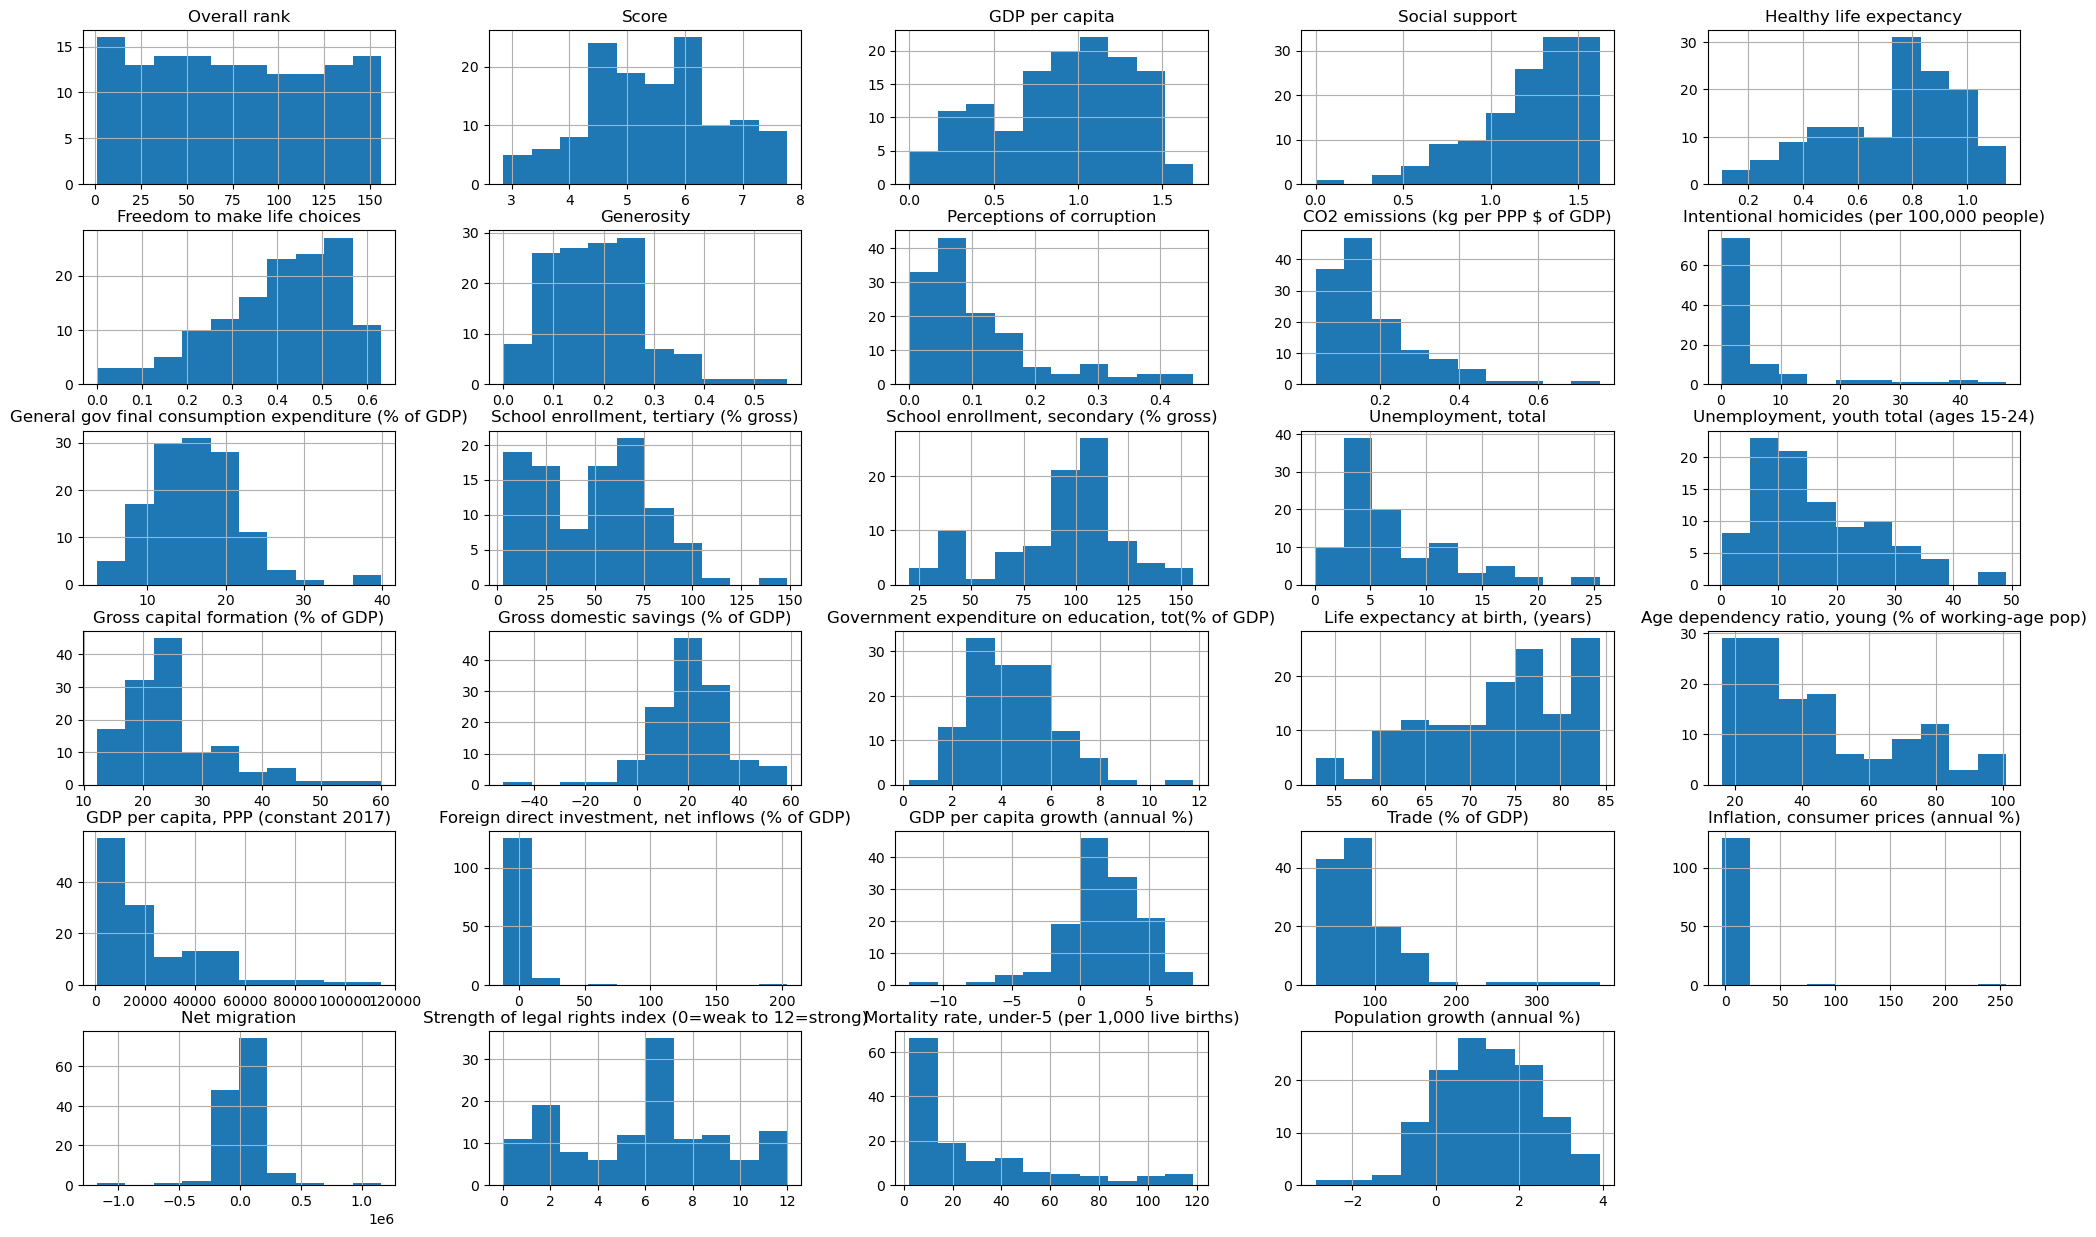

In [180]:
data.hist(figsize=(25, 15), bins=10)
plt.show()

In [193]:
sorted_data = data.nlargest(10, 'CO2 emissions (kg per PPP $ of GDP)')
sorted_data

In [24]:
import matplotlib.pyplot as plt

In [70]:
#plt.bar(data['Country'].head(),data['Score'].head())
#plt.xlabel('Countries')
#plt.ylabel('Happiness Score')
#plt.title('Happiness Score across countries')
#plt.show

# Correlation matrix

In [118]:
data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,CO2 emissions (kg per PPP $ of GDP),"Intentional homicides (per 100,000 people)",General gov final consumption expenditure (% of GDP),"School enrollment, tertiary (% gross)","School enrollment, secondary (% gross)","Unemployment, total","Unemployment, youth total (ages 15-24)",Gross capital formation (% of GDP),Gross domestic savings (% of GDP),"Government expenditure on education, tot(% of GDP)","Life expectancy at birth, (years)","Age dependency ratio, young (% of working-age pop)","GDP per capita, PPP (constant 2017)",GDP per capita (constant 2015 US$),"Foreign direct investment, net inflows (% of GDP)",GDP per capita growth (annual %),Trade (% of GDP),"Inflation, consumer prices (annual %)",Net migration,Strength of legal rights index (0=weak to 12=strong),"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %)
Overall rank,1.000000,-0.989006,-0.815311,-0.780139,-0.808072,-0.546414,-0.058487,-0.402023,-0.044221,0.015818,-0.285860,-0.631941,-0.786642,0.321370,0.225543,0.087612,-0.374111,-0.314313,-0.800356,0.703598,-0.750852,-0.720292,-0.065742,0.091272,-0.303249,0.222884,-0.294665,-0.046319,0.674829,0.343941
Score,-0.989006,1.000000,0.808760,0.789658,0.803720,0.562407,0.091903,0.434706,0.038560,-0.051409,0.292269,0.627208,0.781230,-0.339380,-0.247838,-0.080994,0.378135,0.329047,0.796016,-0.697138,0.753416,0.745266,0.055284,-0.078880,0.301086,-0.241554,0.284251,0.047563,-0.662935,-0.330315
GDP per capita,-0.815311,0.808760,1.000000,0.794542,0.855735,0.413878,-0.068676,0.325045,0.225418,-0.312173,0.380819,0.726336,0.829268,-0.254203,-0.142634,-0.047824,0.603763,0.265875,0.878585,-0.859328,0.847669,0.742809,0.096584,-0.058105,0.422640,-0.217420,0.271730,-0.019480,-0.817266,-0.489866
Social support,-0.780139,0.789658,0.794542,1.000000,0.756243,0.461911,-0.003357,0.238746,0.241210,-0.017923,0.352207,0.590652,0.755481,-0.277271,-0.205597,0.006392,0.432753,0.378942,0.730931,-0.740532,0.608009,0.547716,0.033473,-0.051188,0.331128,-0.116195,0.283078,0.030843,-0.729869,-0.428158
Healthy life expectancy,-0.808072,0.803720,0.855735,0.756243,1.000000,0.423998,-0.050464,0.328545,0.096636,-0.263442,0.266455,0.768278,0.809748,-0.262395,-0.168918,-0.054169,0.438272,0.203285,0.975883,-0.882195,0.718243,0.652819,0.133198,0.040568,0.346203,-0.211365,0.249648,0.059294,-0.911351,-0.553615
Freedom to make life choices,-0.546414,0.562407,0.413878,0.461911,0.423998,1.000000,0.271839,0.468639,-0.017250,0.047591,0.076900,0.095514,0.423749,-0.364228,-0.321580,0.130636,0.318048,0.169168,0.405796,-0.365705,0.414426,0.429408,-0.002648,0.024624,0.184168,-0.122435,0.098322,0.092504,-0.348024,0.010273
Generosity,-0.058487,0.091903,-0.068676,-0.003357,-0.050464,0.271839,1.000000,0.313238,-0.107454,-0.177846,-0.179637,-0.082605,0.057715,-0.285838,-0.283832,0.159520,0.053726,-0.054368,-0.034191,0.061128,0.120449,0.215313,-0.012828,0.070602,0.035838,0.008410,0.048807,0.079237,0.111915,0.181168
Perceptions of corruption,-0.402023,0.434706,0.325045,0.238746,0.328545,0.468639,0.313238,1.000000,-0.170627,-0.240870,0.236407,0.216347,0.303056,-0.174652,-0.216134,0.121821,0.252287,0.143674,0.317443,-0.173535,0.560391,0.662301,-0.064457,-0.094088,0.288443,-0.042838,0.154585,0.022876,-0.181392,0.096213
CO2 emissions (kg per PPP $ of GDP),-0.044221,0.038560,0.225418,0.241210,0.096636,-0.017250,-0.107454,-0.170627,1.000000,0.027949,0.146538,-0.031525,0.088452,0.123130,0.099378,0.150959,0.220622,0.179024,0.119700,-0.219120,0.008144,-0.086806,-0.001989,-0.043980,0.007862,0.127261,-0.027732,-0.043623,-0.241193,-0.159605
"Intentional homicides (per 100,000 people)",0.015818,-0.051409,-0.312173,-0.017923,-0.263442,0.047591,-0.177846,-0.240870,0.027949,1.000000,-0.202509,-0.265543,-0.090492,0.113383,0.084955,-0.214270,-0.347125,0.030990,-0.352451,0.256698,-0.338459,-0.296864,-0.064014,-0.177845,-0.213344,0.016970,-0.

# the most correlated parameters with score

In [188]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the top 10 most correlated columns with the target column
top_correlated_columns = correlation_matrix['Score'].abs().sort_values(ascending=False)[1:11]

print(top_correlated_columns)


Overall rank                                          0.989006
GDP per capita                                        0.808760
Healthy life expectancy                               0.803720
Life expectancy at birth, (years)                     0.796016
Social support                                        0.789658
School enrollment, secondary (% gross)                0.781230
GDP per capita, PPP (constant 2017)                   0.753416
Age dependency ratio, young (% of working-age pop)    0.697138
Mortality rate, under-5 (per 1,000 live births)       0.662935
School enrollment, tertiary (% gross)                 0.627208
Name: Score, dtype: float64


As expected it seems that money can actually buy happiness, as well as a government that supports you, a healthy economy and basic education
Unexpected , at least for me is Generosity that apparently has a low corr with the happiness score, and has a low corr with almost every other parameter

*A high dependency ratio indicates that the economically active population and the overall economy face a greater burden to support and provide the social services needed by children and by older persons who are often economically dependent.

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Heatmap')

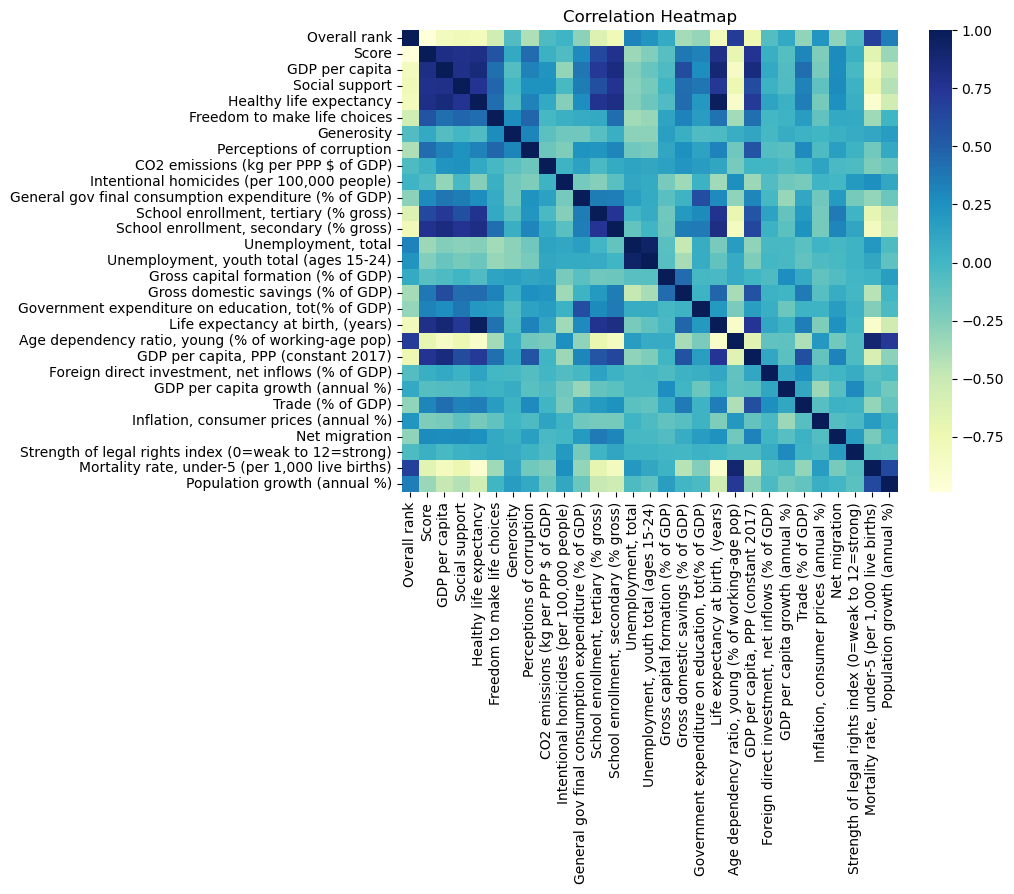

In [185]:
#datacorr=data.drop('Time', axis=1,inplace=True)]
#data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=False,cbar=True);
plt.title("Correlation Heatmap")
plt.show()

# General info of each column
here we can see the disparity of the world once again

In [189]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,CO2 emissions (kg per PPP $ of GDP),"Intentional homicides (per 100,000 people)",General gov final consumption expenditure (% of GDP),"School enrollment, tertiary (% gross)","School enrollment, secondary (% gross)","Unemployment, total","Unemployment, youth total (ages 15-24)",Gross capital formation (% of GDP),Gross domestic savings (% of GDP),"Government expenditure on education, tot(% of GDP)","Life expectancy at birth, (years)","Age dependency ratio, young (% of working-age pop)","GDP per capita, PPP (constant 2017)","Foreign direct investment, net inflows (% of GDP)",GDP per capita growth (annual %),Trade (% of GDP),"Inflation, consumer prices (annual %)",Net migration,Strength of legal rights index (0=weak to 12=strong),"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %)
count,134.000000,134.000000,134.000000,134.000000,134.00000,134.000000,134.000000,134.000000,132.000000,98.000000,128.000000,101.000000,90.000000,99.000000,96.000000,128.000000,129.000000,121.000000,134.000000,134.000000,133.000000,133.000000,133.000000,129.000000,127.000000,1.340000e+02,133.000000,134.000000,134.000000
mean,76.388060,5.461470,0.906082,1.214425,0.73409,0.404784,0.187470,0.113440,0.181367,5.504364,15.957326,49.970721,93.595113,7.087475,16.243021,25.021747,20.817946,4.436169,72.937710,44.718711,22554.736789,5.142864,1.701725,86.345073,5.635967,5.714806e+03,5.827068,27.644030,1.220932
std,45.826234,1.135618,0.401185,0.301567,0.23551,0.141449,0.096458,0.098429,0.116969,9.289361,5.912784,29.630969,29.099626,5.110737,10.218835,8.448128,14.852100,1.743249,7.981682,22.932634,22552.926105,18.699905,2.872752,53.150404,23.806778,1.823038e+05,3.189736,30.844842,1.205611
min,1.000000,2.853000,0.000000,0.000000,0.10500,0.000000,0.000000,0.000000,0.036589,0.204555,3.587513,3.092500,20.555040,0.100000,0.300000,12.239986,-52.027756,0.270000,52.910000,16.148354,729.658463,-11.678110,-12.429867,26.451949,-3.233389,-1.177218e+06,0.000000,2.300000,-2.879866
25%,36.250000,4.566000,0.586250,1.060750,0.55900,0.317250,0.114000,0.047750,0.105171,0.901744,11.842707,23.866560,81.287506,3.685000,8.780000,19.868340,12.880673,3.199280,66.604750,25.717957,5157.546572,1.007346,0.331126,54.338868,0.807975,-2.179025e+04,3.000000,5.325000,0.389834
50%,74.500000,5.449500,0.971500,1.293500,0.80000,0.432000,0.179500,0.085500,0.143530,1.897739,15.914010,53.764912,100.828373,5.360000,12.450000,23.316711,21.623991,4.234090,74.231341,37.256149,14442.040867,2.506995,1.698724,76.042013,2.300093,-2.945500e+03,6.000000,14.450000,1.246596
75%,115.750000,6.217000,1.221000,1.456500,0.88325,0.513250,0.246750,0.142750,0.222427,4.689472,19.088660,70.900879,108.736729,9.555000,22.710000,28.585815,28.988356,5.346680,79.270500,60.580706,34945.661514,4.276339,3.744518,101.600508,3.731241,1.598850e+04,8.000000,42.050000,2.064012
max,156.000000,7.769000,1.684000,1.624000,1.14100,0.631000,0.566000,0.453000,0.757234,47.622889,39.830331,148.530884,156.080612,25.540000,49.040000,60.058311,58.724950,11.780941,84.356341,100.842129,114542.496934,203.645235,8.208649,377.843001,255.304991,1.158444e+06,12.000000,118.600000,3.931356


# MAPS!
There were a lot of attemps to do the maps, forst with folium

In [194]:
import folium


In [2]:
#pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 766.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [195]:
from geopy.geocoders import Nominatim

In [196]:

#installation
#pip install geopy
#function to get longitude and latitude data from country namefrom geopy.geocoders import Nominatimgeolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [197]:
geolocate("USA")

(39.7837304, -100.445882)

In [198]:
country = 'United States'

location = geolocator.geocode(country)
location

Location(United States, (39.7837304, -100.445882, 0.0))

In [199]:
listt=[]
geolocator = Nominatim(user_agent='heatmap_example')

# Iterate over the dataframe rows
for index, row in data.iterrows():
    country = row['Country']
    location = geolocator.geocode(country)
    listt.append((location.latitude, location.longitude))

data['location']=listt

In [200]:
data['location']

0       (63.2467777, 25.9209164)
1        (55.670249, 10.3333283)
2        (61.1529386, 8.7876653)
3      (64.9841821, -18.1059013)
4        (52.2434979, 5.6343227)
                 ...            
129     (-1.9646631, 30.0644358)
130     (-6.5247123, 35.7878438)
131     (33.7680065, 66.2385139)
132      (7.0323598, 19.9981227)
133      (7.8699431, 29.6667897)
Name: location, Length: 134, dtype: object

In [202]:
a,b=data.loc[0,'location']


In [205]:
res=[[a for a, b in data['location']],[b for a, b in data['location']]]

In [206]:
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[13.406,80.110], 
                         zoom_start=2, 
                         tiles="OpenStreetMap")
folium_hmap

In [207]:
latitude=res[0]
longitud=res[1]
my_zip = zip(latitude, longitud, data['GDP per capita'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(63.2467777, 25.9209164, 1.34),
 (55.670249, 10.3333283, 1.383),
 (61.1529386, 8.7876653, 1.488),
 (64.9841821, -18.1059013, 1.38),
 (52.2434979, 5.6343227, 1.396),
 (46.7985624, 8.2319736, 1.452),
 (59.6749712, 14.5208584, 1.387),
 (-41.5000831, 172.8344077, 1.303),
 (61.0666922, -107.991707, 1.365),
 (47.59397, 14.12456, 1.376),
 (-24.7761086, 134.755, 1.372),
 (10.2735633, -84.0739102, 1.034),
 (30.8124247, 34.8594762, 1.276),
 (49.8158683, 6.1296751, 1.609),
 (54.7023545, -3.2765753, 1.333)]

This map doesnt make much sense, , the most heated parts of the world are heated only because there are a lot of countries in that area.
there must be another way

In [208]:
folium_hmap.add_child(HeatMap(list_of_my_zip,
                              min_opacity=0.5,
                              radius = 15,
                              blur = 6))

In [40]:
data[data.Country == 'United States']
#data[data.Country == 'Mexico']

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,iso_a3,CO2 emissions (kg per PPP $ of GDP),"Intentional homicides (per 100,000 people)",General gov final consumption expenditure (% of GDP),"School enrollment, tertiary (% gross)","School enrollment, secondary (% gross)","Unemployment, total","Unemployment, youth total (ages 15-24)",Gross capital formation (% of GDP),Gross domestic savings (% of GDP),"Government expenditure on education, tot(% of GDP)","Life expectancy at birth, (years)","Age dependency ratio, young (% of working-age pop)","GDP per capita, PPP (constant 2017)",GDP per capita (constant 2015 US$),"Foreign direct investment, net inflows (% of GDP)",GDP per capita growth (annual %),Trade (% of GDP),"Inflation, consumer prices (annual %)",Net migration,Strength of legal rights index (0=weak to 12=strong),"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),location
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128,USA,0.225416,4.985947,14.072225,87.88871,100.063431,3.67,8.39,21.319232,18.612228,4.98871,78.787805,28.61653,62478.253954,60698.011299,1.472075,1.829668,26.451949,1.81221,1158444.0,11.0,6.4,0.455381,"(39.7837304, -100.445882)"


# Let's try with geopandas

In [100]:
#conda install geopandas

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/wonderflow/opt/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |   py39hecd8cb5_0          44 KB
    cairo-1.16.0               |       h691a603_2         935 KB
    click-plugins-1.1.1        |     pyhd3eb1b0_0          10 KB
    cligj-0.7.2                |   py39hecd8cb5_0          13 KB
    expat-2.4.9                |       he9d5cce_0         127 KB
    fion

shapely-2.0.1        | 407 KB    | ##################################### | 100% 
xerces-c-3.2.4       | 2.5 MB    | ##################################### | 100% 
libnetcdf-4.8.1      | 947 KB    | ##################################### | 100% 
pixman-0.40.0        | 341 KB    | ##################################### | 100% 
click-plugins-1.1.1  | 10 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [209]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [210]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [211]:
world   #we noticed that we might actally need the acronymes, lets go back to the beginning

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [212]:
world[world.iso_a3 == 'USA']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [213]:
SHAPEFILE = 'data/shapefiles/worldmap/ne_10m_admin_0_countries.shp'


In [214]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name':'Country'})
merged = world.merge(data, left_on='iso_a3', right_on='iso_a3', how='left')

<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap World Map')

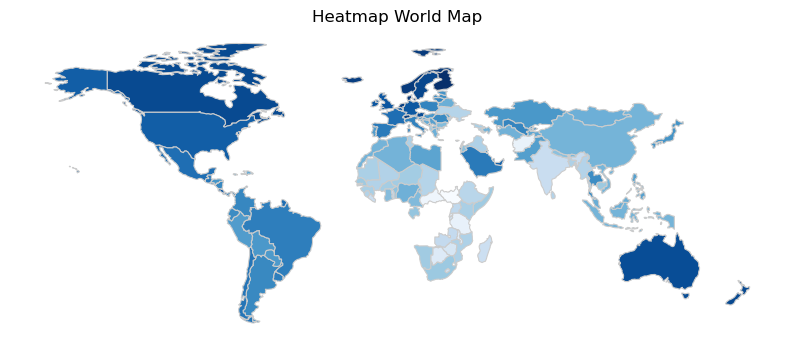

In [215]:
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='Score', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Heatmap World Map')
ax.set_axis_off()
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Lets do a function

In [216]:

def worldmap(column_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    merged.plot(column=column_name, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.set_title(column_name +' World Heat Map')
    ax.set_axis_off()

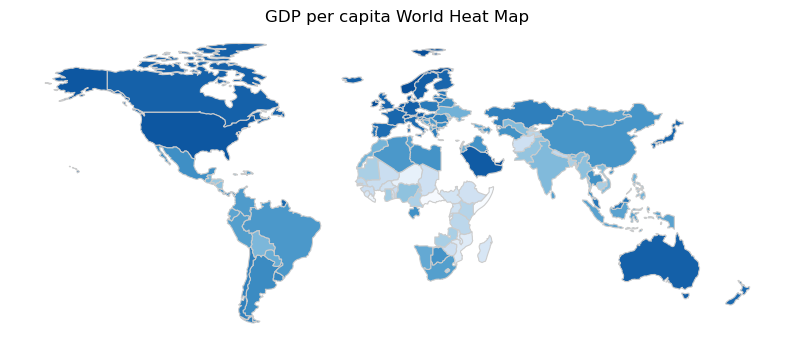

In [217]:
worldmap('GDP per capita')

In [52]:
import numpy as np
import pandas as pd
import scipy

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)


In [53]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [224]:
from ipywidgets import interact, interact_manual

*First we have to re mention that not all countries have data, there in our map it might be missing some countries (like Russia)

In [59]:

@interact
def worldmap(column=list(merged.select_dtypes('number').columns)):
    fig, ax = plt.subplots(figsize=(10, 6))
    merged.plot(column=merged[column], cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.set_title(column +' World Heat Map')
    ax.set_axis_off()

interactive(children=(Dropdown(description='column', options=('pop_est', 'gdp_md_est', 'Overall rank', 'Score'…

# Some insights
With the maps we can confirm some of our hipothesis (maybe alredy proven in previous EDA)
score map, gdp per capita map, social support map and others are very similar
- gdp per capita PPP: only the "developped world" & and Saundi Arabia
- America (the continent) and East Asia seems very "free"
- only a few countries are responsible for most of Co2 emissions
- Intentional homicides: El Salvador, Mexico (central America), South Africa, Brazil, ...
- a lot of missing data in school enrollments
- Unemployment: South Africa, South America, South Europe
- Age dependency ratio: A lot of young people and a few older people in Africa which should be good for the economy. Africa also has the biggest population growth. & Europe is the opposite
- the USA is and always will be a destination for immigrants
- strength of legal rights doesnt make sense
- it doesnt seems to be a concentrated area for Generosity ,is distributed randomly, excep of South East Asia

# A plot between 2 parameters

In [219]:
import plotly.express as px

fig = px.line(data,
              x='Score',
              y='GDP per capita'
             )

fig.show(renderer="browser");

In [225]:

@interact_manual
def plotline(x=list(data.select_dtypes('number').columns),y=list(data.select_dtypes('number').columns)):
    fig=px.line(data,x=x,y=y)
    fig.update_layout(title="Relationship between "+ x +" and "+y)
    fig.show(renderer="browser");

interactive(children=(Dropdown(description='x', options=('Overall rank', 'Score', 'GDP per capita', 'Social su…

# Conclusion
most of our hipothesis were confirmed by our EDA, but having pictures like graphs and maps is always easier to understand.
There is a lot of DISPARITY in our world. it seems that all the money and happiness (based on the hapiness index) are concentrated only in one part of the world, but actually ALL paramteres seems to be distributed un evenly in the world.

Worth to mention:
- this data is from 2019, a lot of things must have happend in the last 4 years
- there is another interesting index called positive emotion index also from Galliup World Poll which are led by Latin-American countries and Indonesia. I would have added this index but I didnt have time :/